# Data description 
Some plots to help understand better the problem domain and studied dataset.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


### Loading data

In [53]:
data=pd.read_csv("RD_data/RD_VougaR_pg.csv").values
X = data[:,2:4]
y = data[:,1]
dias = data[:,0]

temp = data[:,2]
prec = data[:,3]
print(X.shape)

(955, 2)


### Avarage monthly temperature 

Text(0, 0.5, 'Temperature')

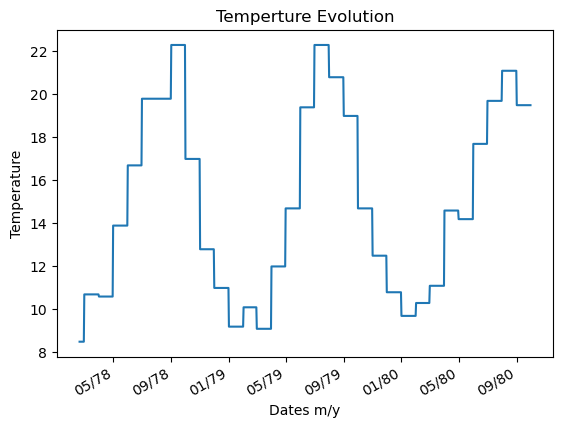

In [54]:
plotDates = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dias]


plt.plot(plotDates,temp)
plt.xlabel("Dates m/y")
plt.title("Temperture Evolution")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gcf().autofmt_xdate()
plt.ylabel("Temperature")

### Daily precipitation levels

Text(0, 0.5, 'Precipitation')

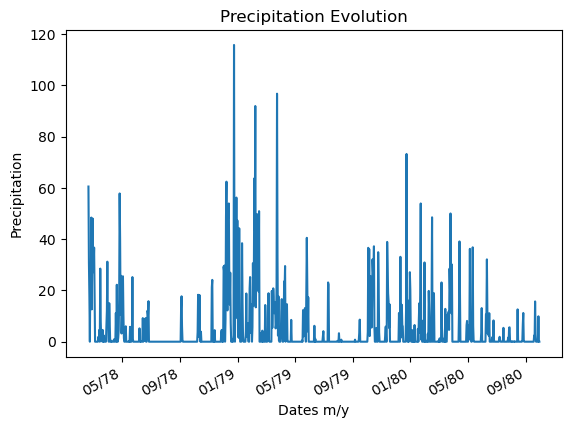

In [55]:
plt.plot(plotDates,prec)
plt.xlabel("Dates m/y")
plt.title("Precipitation Evolution")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gcf().autofmt_xdate()
plt.ylabel("Precipitation")

### River Discharge (RD) evolution

Text(0, 0.5, 'River Discharge')

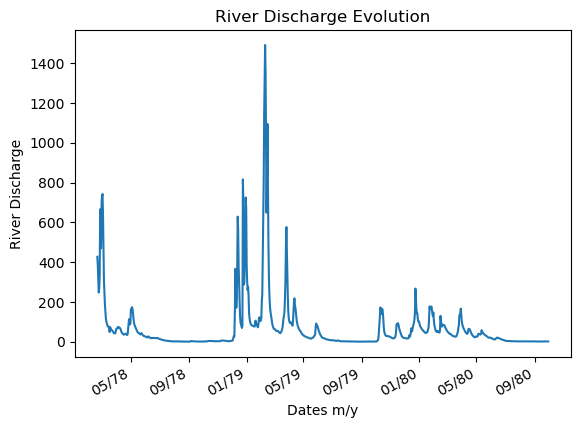

In [56]:
plt.plot(plotDates,y)
plt.xlabel("Dates m/y")
plt.title("River Discharge Evolution")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gcf().autofmt_xdate()
plt.ylabel("River Discharge")

### River discharge by year

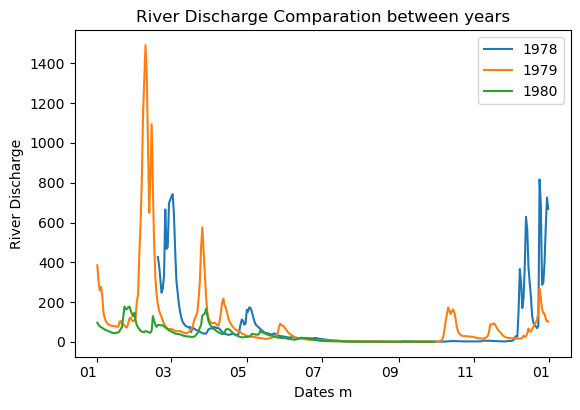

In [57]:
year_data = {}
for i in range(len(plotDates)):
    year = plotDates[i]
    if year.strftime("%Y") not in year_data.keys():
        daymes = plotDates[i].replace(year=2000)
        year_data[year.strftime("%Y")] = [[daymes],[y[i]]]
    else:
        daymes = plotDates[i].replace(year=2000)
        year_data[year.strftime("%Y")][0].append(daymes)
        year_data[year.strftime("%Y")][1].append(y[i])

for key in year_data.keys():
    plt.plot(year_data[key][0],year_data[key][1],label=key)

plt.xlabel("Dates m")
plt.title("River Discharge Comparation between years")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.gcf().autofmt_xdate(rotation=0)
plt.ylabel("River Discharge")
plt.legend()
